# **Практика 5. Агрегирование данных. Сводные таблицы**

[SmartLMS](https://edu.hse.ru/mod/quiz/view.php?id=1610936)

Вам предстоит работать с датасетом, который содержит информацию о винах, продающихся в некотором специализированном магазине в Польше.  

Датасет содержит следующие признаки:

| name	 | 	  название вина | 	 
| --- | --- | 
| price (PLN)  | 	 цена бутылки вина (польский злотый) | 	 
| country	 | 	  страна производства | 	 
| region	 | 	  регион производства | 	 
| color | 	 цвет вина | 	 
| alcohol (%) | процент алкоголя | 	 
| volume (liters) | объем бутылки | 	 
| taste | вкус вина | 	 
| punctation | оценка сомелье | 	 

In [1]:
import pandas as pd
df = pd.read_csv('data/wine_data.csv')

## **Задание 1**
>*Рассчитайте общую выручку от вин (`price (PLN)`), произведенных во Франции (`France`; `country`). Результат округлите до двух десятичных знаков.*

In [3]:
cond = df['country'] == 'France'

df[cond]['price (PLN)'].sum().round(2)

np.float64(28212.0)

---

## **Задание 2**

>*Рассчитайте среднее значение оценок сомелье (`punctation`) для вин розового (`rose`; `color`) и белого (`white`; `color`) цветов. Результат округлите до двух десятичных знаков.*


In [4]:
cond = df['color'].isin(['rose', 'white'])

df[cond]['punctation'].mean().round(2)

np.float64(91.99)

---

## **Задание 3**

>*Определите количество уникальных стран (`country`) производителей сухих вин (`dry`; `taste`), оценки которых ниже среднего значения оценки сомелье (`punctation`).*

In [5]:
cond = (df['taste'] == 'dry') & (df['punctation'] < df['punctation'].mean())

df[cond]['country'].nunique()

11

---

## **Задание 4**

>*Найдите минимальную цену (`price (PLN)`) среди вин, у которых содержание алкоголя (`alcohol (%)`) не ниже среднего или цвет — красный (`red`; `color`). Результат округлите до двух знаков.*

In [6]:
cond = (df['alcohol (%)'] > df['alcohol (%)'].mean()) | (df['color'] == 'red')
df[cond]['price (PLN)'].min().round(2)

np.float64(55.0)

---

## **Задание 5**

>*Найдите размах цены (`price (PLN)`) среди вин региона Тоскана (`Tuscany`; `region`). Результат округлите до двух знаков.*

In [7]:
cond = df['region'] == 'Tuscany'

df[cond]['price (PLN)'].max() - df[cond]['price (PLN)'].min().round(2)

np.float64(2425.0)

---

## **Задание 6**

>*Постройте сводную таблицу, где по строкам располагаются уровни содержания алкоголя (`alcohol (%)`), а в столбце указаны средние оценки сомелье (`punctation`). Укажите уровень алкоголя, который соответствует наибольшему среднему значению оценки. Результат округлите до двух знаков.*


In [11]:
df.groupby('alcohol (%)')['punctation'].mean().sort_values(ascending=False)

alcohol (%)
16.00    94.500000
13.36    93.500000
8.50     93.000000
14.00    92.750000
14.50    92.683333
15.00    92.430556
13.00    92.288462
13.50    92.106918
15.50    92.000000
12.50    91.545455
11.50    91.000000
14.10    91.000000
14.30    91.000000
12.00    90.500000
11.00    90.000000
Name: punctation, dtype: float64

**Ответ**: `16.00`

---

## **Задание 7**

>*Постройте сводную таблицу, где по строкам располагаются цвета вин (`color`), а в ячейках указана общая выручка (`price (PLN)`) от вина каждого цвета. Укажите какой из графиков визуализирует распределение выручки магазина от каждого цвета вина.*


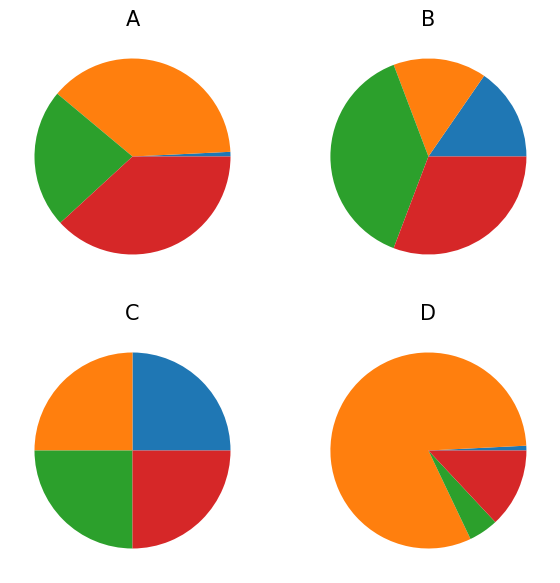

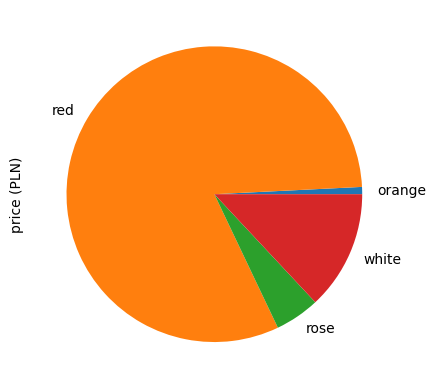

In [12]:
df.groupby('color')['price (PLN)'].sum().plot(kind='pie');

**Ответ**: `D`

---

## **Задание 8**

>*Постройте сводную таблицу, где по строкам располагаются страны (`country`), а в столбцах отображается количество уникальных регионов (`region`) в которых производят вино в каждой стране. Укажите какой из графиков показывает количество уникальных регионов, в которых производят вино в каждой стране. *


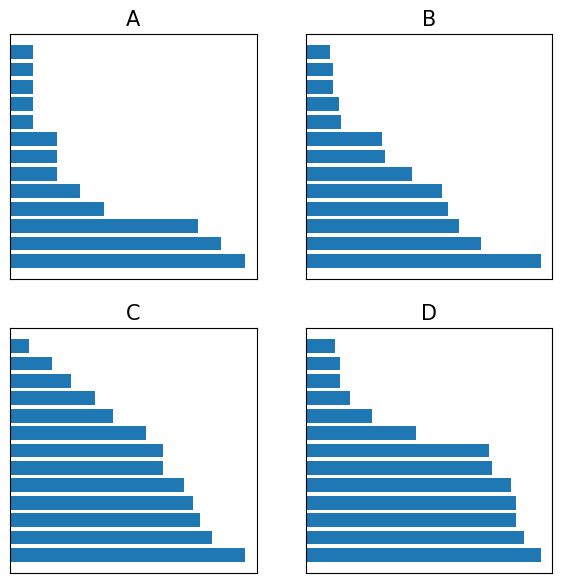

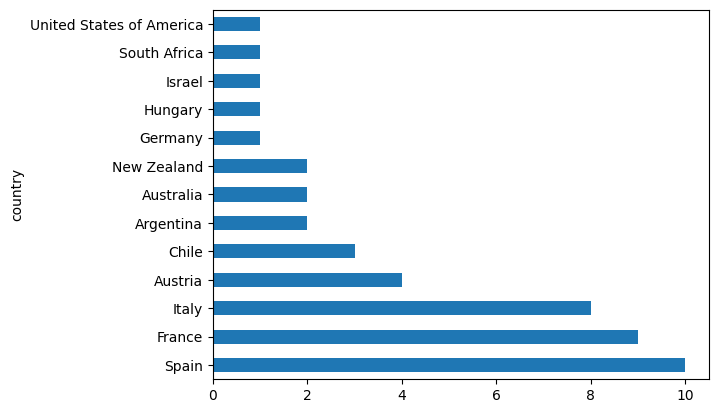

In [10]:
df.groupby('country')['region'].nunique().sort_values(ascending=False).plot(kind='barh');

**Ответ**: `A`

---

## **Задание 9**

>*Постройте сводную таблицу, где по строкам расположены пары страна–регион (`country`, `region`), а в ячейках указана средняя цена (`price (PLN)`). Определите страну и регион с самой высокой средней стоимостью вина.*


In [14]:
df.groupby(['country', 'region'])['price (PLN)'].mean().sort_values(ascending=False).head(1)

country  region   
France   Champagne    1629.0
Name: price (PLN), dtype: float64

**Ответ**
- `country`: `France`
- `region`: `Champagne`

---

## **Задание 10**

>*Постройте сводную таблицу, где по строкам расположены регионы (`region`) производства, а в колонках приведены сумма цен (`price (PLN)`) и общий объем (`volume (liters)`) бутылок. Укажите количество регионов производства вин, в которых удельная цена (отношению общего объема к сумме цен) меньше или равен среднему для этого показателя.*


In [15]:
df_grouped = df.groupby('region').agg({
    'price (PLN)': 'sum',
    'volume (liters)': 'sum'
})

df_grouped['dev'] = df_grouped['volume (liters)'] / df_grouped['price (PLN)']

df_grouped[df_grouped['dev'] <= df_grouped['dev'].mean()].shape

(24, 3)

---

## **Задание 11**

>*Постройте сводную таблицу, где по строкам располагаются страны производства (`country`), а в столбцах представлены минимальная и максимальная цены на вина (`price (PLN)`). В ответе укажите максимальное значение размаха цены для некоторой страны. Ответ округлите до двух знаков.*


In [16]:
df_grouped = df.groupby('country')['price (PLN)'].agg(
    minimum='min',
    maximum='max'
)

df_grouped['range_'] = df_grouped['maximum'] - df_grouped['minimum']
df_grouped.sort_values('range_')

,minimum,maximum,range_
country,,,
Hungary,145.0,145.0,0.0
Israel,195.0,195.0,0.0
New Zealand,145.0,149.0,4.0
Germany,169.0,227.0,58.0
Australia,84.0,289.0,205.0
Austria,69.0,279.0,210.0
South Africa,89.0,362.0,273.0
Argentina,65.0,340.0,275.0
United States of America,115.0,419.0,304.0
